<a href="https://colab.research.google.com/github/sandrasd/OcorrenciasAeronauticas/blob/master/analise_ocorrencias_aeronauticas_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ocorrências aeronáuticas do Brasil, de 2010 a 2019**


Este estudo tem como objetivo analisar as ocorrências aeronáuticas, que ocorreram em solo brasileiro, entre 2010 a 2019, obtidas pelo Portal Brasileiro de Dados Abertos, Ocorrências Aeronáuticas na Aviação Civil Brasileira, gerenciadas pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA).

## **Importação das bibliotecas e Leitura dos dados**

In [ ]:
pip install sidetable

In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sidetable
import os

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from collections import Counter

In [ ]:
from seaborn import countplot
from matplotlib.pyplot import figure, show

In [ ]:
ocorrencia = pd.read_csv("../content/ocorrencia.csv",
                        na_values=['****', '***','', 'NULL'],
                        header=0, sep = ';',
                        engine = 'python'
                       )

In [ ]:
#ocorrencia.dataframeName = 'Ocorrencias'
#nRow, nCol, = ocorrencia.shape

ocorrencia.head()

In [ ]:
ocorrencia.columns

Inserção das outras bases: ocorrencia tipo, aeronave e fatores contribuintes.

In [ ]:
octipo = pd.read_csv("../content/ocorrencia_tipo.csv",
                        na_values=['', 'NULL'],
                        header=0, sep = ';',
                        engine = 'python'
                       )

In [ ]:
#octipo.dataframeName = 'Ocorrenciastipo'
#nRow, nCol, = octipo.shape

octipo.head()

In [ ]:
aeronave = pd.read_csv("../content/aeronave.csv",
                        na_values=['***','', 'NULL'],
                        header=0, sep = ';',
                        engine = 'python'
                       )

In [ ]:
#aeronave.dataframeName = 'Aeronave'
#nRow, nCol, = aeronave.shape

aeronave.head()

In [ ]:
fatorc = pd.read_csv("../content/fator_contribuinte.csv",
                        na_values=['***','', 'NULL'],
                        header=0, sep = ';',
                        engine = 'python'
                       )

In [ ]:
#fatorc.dataframeName = 'FatorContribuinte'
#nRow, nCol, = fatorc.shape

fatorc.head()

## **Limpeza dos dados** 
ocorrencia - Tirar colunas de codigo ocorrencia 4, lat, long, país, aerodromo, hora, investigação aeronave liberada, investigação status, divulgação relatório numero, divulgação relatório publicado, divulgação dia publicação, total de recomendações, ocorrencia saida pista;
aeronave - manter apenas codigo, tipo veiculo, modelo, tipo icao, fase operacao, nivel dano e fatalidades total.

In [ ]:
ocorrencia = ocorrencia.drop(columns = ['codigo_ocorrencia4','ocorrencia_latitude', 'ocorrencia_longitude',
                                       'ocorrencia_pais','ocorrencia_aerodromo',
                                        'ocorrencia_hora','investigacao_aeronave_liberada',
                                        'investigacao_status','divulgacao_relatorio_numero',
                                        'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
                                        'total_recomendacoes', 
                                        'ocorrencia_saida_pista' ])

In [ ]:
ocorrencia.columns

In [ ]:
aeronave.columns

In [ ]:
aeronave = aeronave.drop(columns = ['aeronave_matricula',
       'aeronave_operador_categoria',
       'aeronave_fabricante',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino',
       'aeronave_tipo_operacao'])

In [ ]:
aeronave.columns

In [ ]:
ocorrencia = ocorrencia.replace(['S�O PAULO','BRAS�LIA','GOI�NIA','S�O LU�S','BEL�M','BRAGAN�A PAULISTA','VIT�RIA','FOZ DO IGUA�U','FLORIAN�POLIS'],
                                ['SÃO PAULO','BRASÍLIA','GOIÂNIA','SÃO LUÍS','BELÉM','BRAGANÇA PAULISTA','VITÓRIA','FOZ DO IGUAÇU','FLORIANÓPOLIS'])

In [ ]:
aeronave = aeronave.replace(['AVI�O','HELIC�PTERO','ANF�BIO','HIDROAVI�O','CORRIDA AP�S POUSO','DESTRU�DA','T�XI',
                             'APROXIMA��O FINAL','CIRCUITO DE TR�FEGO','DIRIG�VEL','BAL�O', 'OPERA��O DE SOLO','SA�DA IFR',
                             'DESCIDA DE EMERG�NCIA'],
                            ['AVIÃO','HELICÓPTERO','ANFÍBIO','HIDROAVIÃO','CORRIDA APÓS POUSO','DESTRUÍDA','TÁXI',
                            'APROXIMAÇÃO FINAL','CIRCUITO DE TRÁFEGO','DIRIGÍVEL','BALÃO',
                             'OPERAÇÃO DE SOLO','SAÍDA IFR','DESCIDA DE EMERGÊNCIA'])

In [ ]:
octipo = octipo.replace(['TR�FEGO A�REO','COLIS�O COM AVE','VAZAMENTO DE COMBUST�VEL','COMBUST�VEL | PANE SECA',
                'FOGO/FUMA�A (SEM IMPACTO) | FOGO EM VOO', 'OPERA��ES','OBST�CULOS','COLIS�O COM OBST�CULO DURANTE A DECOLAGEM E POUSO'],
               ['TRÁFEGO AÉREO','COLISÃO COM AVE','VAZAMENTO DE COMBUSTÍVEL','COMBUSTÍVEL | PANE SECA',
                'FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO','OPERAÇÕES','OBSTÁCULOS','COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO'])

In [ ]:
fatorc = fatorc.replace(['APLICA��O DE COMANDOS','OPERA��O DA AERONAVE','ASPECTO PSICOL�GICO','PERCEP��O','POUCA EXPERI�NCIA DO PILOTO',
                        'MANUTEN��O DE AERONAVE','SUPERVIS�O GERENCIAL','COORDENA��O DE CABINE','INSTRU��O','PROCESSO DECIS�RIO',
                        'INFRAESTRUTURA AEROPORTU�RIA','ASPECTO M�DICO','INFRAESTRUTURA DE TR�FEGO A�REO','ASPECTO DA FABRICA��O',
                        'MANUTEN��O DA AERONAVE','PRESTA��O DE SERVI�OS DE TR�FEGO A�REO'],
               ['APLICAÇÃO DE COMANDOS','OPERAÇÃO DA AERONAVE','ASPECTO PSICOLÓGICO','PERCEPÇÃO','POUCA EXPERIÊNCIA DO PILOTO',
               'MANUTENÇÃO DE AERONAVE','SUPERVISÃO GERENCIAL','COORDENAÇÃO DE CABINE','INSTRUÇÃO','PROCESSO DECISÓRIO',
               'INFRAESTRUTURA AEROPORTUÁRIA','ASPECTO MÉDICO','INFRAESTRUTURA DE TRÁFEGO AÉREO','ASPECTO DA FABRICAÇÃO',
               'MANUTENÇÃO DA AERONAVE','PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO'])

## **Estatística descritiva das ocorrências**

A análise dos dados poderá responder às seguintes questões (demais questões serão analisadas por incidentes e acidentes, separadamente):

1) Quantas ocorrências houve, por ano?

2) Como é a distribuição da classificação das ocorrências?


In [ ]:
# Inserindo colunas de dia, ano e mês na base de ocorrencias

ocorrencia['ocorrencia_dia'] = pd.to_datetime(ocorrencia['ocorrencia_dia'])
ocorrencia['Dia'] = ocorrencia['ocorrencia_dia'].map(lambda x: x.day)
ocorrencia['Ano'] = ocorrencia['ocorrencia_dia'].map(lambda x: x.year)
ocorrencia['Mes'] = ocorrencia['ocorrencia_dia'].map(lambda x: x.month)

Verificar quantos registros distintos há em cada coluna.

In [ ]:
ocorrencia.nunique()

In [ ]:
aeronave.nunique()

In [ ]:
octipo.nunique()

In [ ]:
fatorc.nunique()

In [ ]:
# Gráfico de ocorrencias Por ano - palette
px = ocorrencia.Ano.value_counts()

#palette_platform = sns.light_palette("green",25,reverse=True)
fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=ocorrencia) #palette=palette_platform,
#plt.title('Ocorrências por Ano',fontsize=21)
plt.xlabel('Ano')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

In [ ]:
# Total de ocorrencias, incidentes e acidentes
print('Total: ' +
      str(ocorrencia['ocorrencia_classificacao'].count())
     )

print('INCIDENTE: ' +
      str(ocorrencia['ocorrencia_classificacao'][ocorrencia['ocorrencia_classificacao'] == 'INCIDENTE'].count())
     )

print('INCIDENTE GRAVE: ' +
      str(ocorrencia['ocorrencia_classificacao'][ocorrencia['ocorrencia_classificacao'] == 'INCIDENTE GRAVE'].count())
     )

print('ACIDENTE: ' +
      str(ocorrencia['ocorrencia_classificacao'][ocorrencia['ocorrencia_classificacao'] == 'ACIDENTE'].count())
     )

In [ ]:
# Gráfico por classificação - valores abs e %
px = ocorrencia.ocorrencia_classificacao.value_counts()

fig, (cx,dx) = plt.subplots(1,2, figsize=(12,6))

#fig = plt.figure(figsize=(5,5))
#cx = sns.barplot(px.index, px.values,data=ocorrencia, color="red")
cx.bar(px.index, px.values, color=("blue","orange","green"))
#plt.xlabel('Classificação')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+50))

# Graf classificacao da ocor - pizza
dx = ocorrencia['ocorrencia_classificacao'].value_counts().plot(kind='pie', subplots=True,
                                                     label="" ,
                                                    # figsize=(6, 6),
                                                     autopct='%1.0f%%'
                                                     )

## **Estatística descritiva dos incidentes**

A análise dos incidentes, a partir de merge das tabelas, poderá responder as seguintes questões:

1) Quantos foram os incidentes, por ano?

2) Quantos são os incidentes por UF?

3) Em quantos incidentes houve fatalidade?

4) Quais os tipos de ocorrência mais e menos frequentes?

5) Quais os modelos e tipos de aeronaves mais frequentes?

6) Quantos incidentes houve, pela fase da operação?

7) Quais foram os níveis de danos, encontrados nos incidentes?

8) Quais foram os fatores contribuintes que mais ocorreram para incidentes?


In [ ]:
# df de incidentes
inc = ocorrencia[ocorrencia['ocorrencia_classificacao'] != 'ACIDENTE']

In [ ]:
inc

In [ ]:
inc['Ano'].count

In [ ]:
# gráfico de incidentes por ano - palette
px = inc.Ano.value_counts()

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=ocorrencia)
#plt.title('incidentes por Ano',fontsize=21)
plt.xlabel('Ano')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

In [ ]:
# qtd de incidentes
print('INCIDENTES: ' +
      str(ocorrencia['ocorrencia_classificacao'][ocorrencia['ocorrencia_classificacao'] != 'ACIDENTE'].count())
     )

In [ ]:
# incid por cidade
inc['ocorrencia_cidade'].value_counts()

In [ ]:
# gráfico de incidentes por cidade - 10+
px = inc['ocorrencia_cidade'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=ocorrencia, color="blue")

plt.xlabel('Cidade')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+1))

In [ ]:
# incid por UF
inc['ocorrencia_uf'].value_counts()

SP    882
RJ    410
MG    355
PR    305
RS    175
GO    163
AM    151
PA    144
BA    142
DF    122
MT    108
SC    106
PE     71
ES     61
MS     58
CE     56
AC     42
MA     39
TO     28
AL     25
PI     22
RO     20
RR     19
PB     16
SE     13
RN     10
AP      5
Name: ocorrencia_uf, dtype: int64

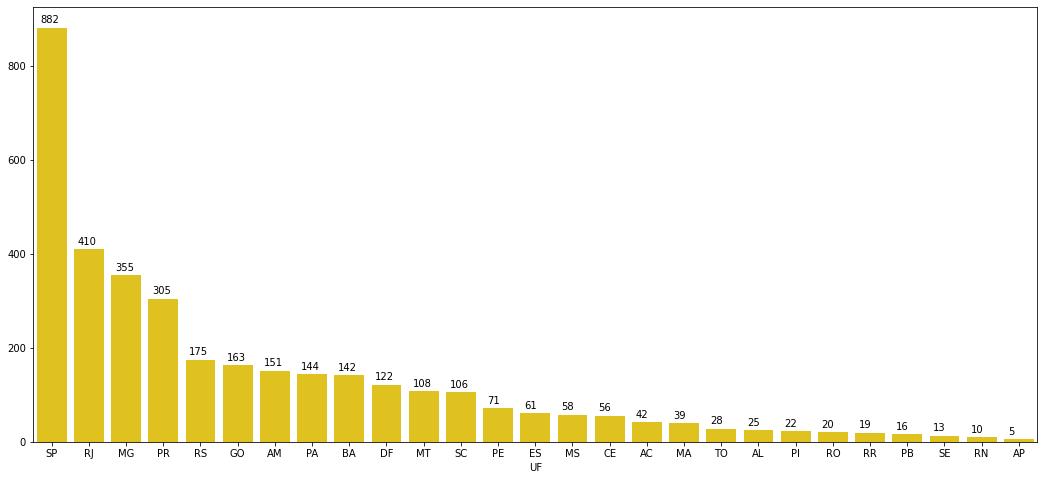

In [ ]:
# gráfico de incidentes por UF
px = inc.ocorrencia_uf.value_counts()

fig = plt.figure(figsize=(18,8))
cx = sns.barplot(px.index, px.values,data=ocorrencia, color="gold")
plt.xlabel('UF')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

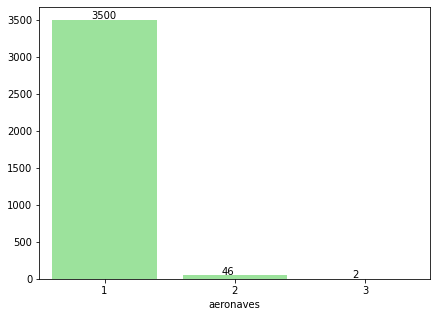

In [ ]:
# gráfico de incidentes por aeronaves envolvidas
px = inc.total_aeronaves_envolvidas.value_counts()


fig = plt.figure(figsize=(7,5))
cx = sns.barplot(px.index, px.values,data=ocorrencia, color="lightgreen")
plt.xlabel('aeronaves')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))

In [ ]:
# mergear tabelas ocorrencia e aeronave, pelo cod ocorrencia 2
inner_merged = pd.merge(ocorrencia, aeronave, on=["codigo_ocorrencia2"], how="inner")

In [ ]:
inner_merged.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,Dia,Ano,Mes,aeronave_tipo_veiculo,aeronave_modelo,aeronave_tipo_icao,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,AVIÃO,EMB-711A,P28R,DECOLAGEM,SUBSTANCIAL,0
1,39155,39155,39155,39155,INCIDENTE,BELO HORIZONTE,MG,2010-05-02,1,2,2010,5,AVIÃO,C90,BE9L,DECOLAGEM,NENHUM,0
2,39156,39156,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,2010-10-01,1,1,2010,10,AVIÃO,ATR-72-212A,AT72,ARREMETIDA NO AR,LEVE,0
3,39158,39158,39158,39158,INCIDENTE,BELÉM,PA,2010-01-28,1,28,2010,1,AVIÃO,757-225,B752,SUBIDA,NENHUM,0
4,39176,39176,39176,39176,INCIDENTE,SÃO LUÍS,MA,2010-05-02,1,2,2010,5,AVIÃO,A320-232,A320,SUBIDA,NENHUM,0


In [ ]:
inner_merged.shape

(5307, 18)

In [ ]:
# criar df pra tabela nova, com filtro pelos incidentes e inc graves
df_inc = inner_merged[inner_merged['ocorrencia_classificacao'] != 'ACIDENTE']

In [ ]:
df_inc.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,Dia,Ano,Mes,aeronave_tipo_veiculo,aeronave_modelo,aeronave_tipo_icao,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
1,39155,39155,39155,39155,INCIDENTE,BELO HORIZONTE,MG,2010-05-02,1,2,2010,5,AVIÃO,C90,BE9L,DECOLAGEM,NENHUM,0
2,39156,39156,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,2010-10-01,1,1,2010,10,AVIÃO,ATR-72-212A,AT72,ARREMETIDA NO AR,LEVE,0
3,39158,39158,39158,39158,INCIDENTE,BELÉM,PA,2010-01-28,1,28,2010,1,AVIÃO,757-225,B752,SUBIDA,NENHUM,0
4,39176,39176,39176,39176,INCIDENTE,SÃO LUÍS,MA,2010-05-02,1,2,2010,5,AVIÃO,A320-232,A320,SUBIDA,NENHUM,0
5,39178,39178,39178,39178,INCIDENTE,CAMPINAS,SP,2010-08-02,1,2,2010,8,AVIÃO,A320-232,A320,SUBIDA,NENHUM,0


In [ ]:
df_inc.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'ocorrencia_classificacao', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_dia', 'total_aeronaves_envolvidas', 'Dia',
       'Ano', 'Mes', 'aeronave_tipo_veiculo', 'aeronave_modelo',
       'aeronave_tipo_icao', 'aeronave_fase_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

In [ ]:
df_inc.shape
# Tem 3598 obs, pois há 46 incidentes que envolveram 2 aeronaves e 2 com 3 aeronaves

(3598, 18)

In [ ]:
df_inc.count()

codigo_ocorrencia             3598
codigo_ocorrencia1            3598
codigo_ocorrencia2            3598
codigo_ocorrencia3            3598
ocorrencia_classificacao      3598
ocorrencia_cidade             3598
ocorrencia_uf                 3598
ocorrencia_dia                3598
total_aeronaves_envolvidas    3598
Dia                           3598
Ano                           3598
Mes                           3598
aeronave_tipo_veiculo         3544
aeronave_modelo               3544
aeronave_tipo_icao            3489
aeronave_fase_operacao        3592
aeronave_nivel_dano           3579
aeronave_fatalidades_total    3598
dtype: int64

In [ ]:
# estat básicas
df_inc.describe()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,total_aeronaves_envolvidas,Dia,Ano,Mes,aeronave_fatalidades_total
count,3598.000000,3598.000000,3598.000000,3598.000000,3598.000000,3598.000000,3598.000000,3598.000000,3598.0
mean,56211.845748,56211.845748,56211.845748,56211.845748,1.028905,15.690106,2014.094219,6.491384,0.0
std,13059.041934,13059.041934,13059.041934,13059.041934,0.177238,8.778678,2.878460,3.418589,0.0
min,39155.000000,39155.000000,39155.000000,39155.000000,1.000000,1.000000,2010.000000,1.000000,0.0
25%,45950.250000,45950.250000,45950.250000,45950.250000,1.000000,8.000000,2012.000000,3.000000,0.0
50%,51540.500000,51540.500000,51540.500000,51540.500000,1.000000,16.000000,2014.000000,6.000000,0.0
75%,66443.750000,66443.750000,66443.750000,66443.750000,1.000000,23.000000,2017.000000,9.000000,0.0
max,79203.000000,79203.000000,79203.000000,79203.000000,3.000000,31.000000,2019.000000,12.000000,0.0


In [ ]:
# Qtd de codigos de incidentes únicos
df_inc.codigo_ocorrencia2.nunique()

3548

In [ ]:
# incidentes com mais  qtd códigos repetidos (envolvimento de mais de uma aeronave)
df_inc.codigo_ocorrencia2.value_counts().head(51)

78249    3
45689    3
47245    2
79066    2
78591    2
60726    2
77281    2
51807    2
41609    2
52345    2
52343    2
77803    2
52992    2
61014    2
60846    2
53104    2
77781    2
51864    2
78799    2
52614    2
78071    2
65963    2
78102    2
51883    2
65420    2
66991    2
45903    2
51456    2
49171    2
79089    2
65736    2
49534    2
78035    2
78411    2
52288    2
66445    2
79067    2
50384    2
51080    2
78306    2
45230    2
51781    2
49525    2
77859    2
77832    2
77498    2
60996    2
45222    2
45779    1
45783    1
66261    1
Name: codigo_ocorrencia2, dtype: int64

In [ ]:
# Incidentes, por tipos de aeronaves 
print(df_inc['aeronave_tipo_veiculo'].value_counts())

AVIÃO          3040
HELICÓPTERO     402
ULTRALEVE        91
PLANADOR          5
ANFÍBIO           5
HIDROAVIÃO        1
Name: aeronave_tipo_veiculo, dtype: int64


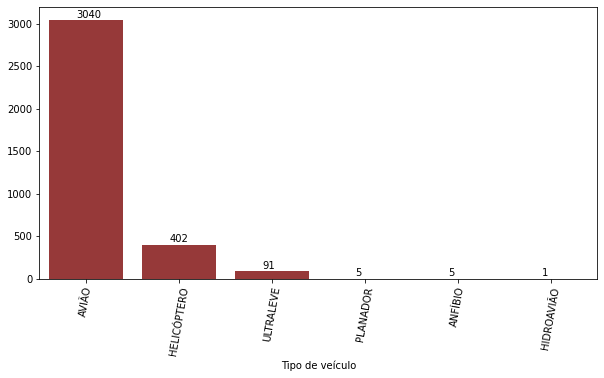

In [ ]:
# gráfico de incidentes por aeronave_tipo_veiculo
px = df_inc['aeronave_tipo_veiculo'].value_counts()

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=aeronave, color="brown")
plt.xlabel('Tipo de veículo')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+30))

In [ ]:
# Incidentes, por modelo 
print(df_inc['aeronave_modelo'].value_counts())

ATR-72-212A         163
ERJ 190-200 IGW     137
EMB-810D            125
AB-115              121
152                  97
                   ... 
PARADISE P4           1
BUCKER                1
AMAZON                1
EMB-711               1
NORTH LAND PA-18      1
Name: aeronave_modelo, Length: 527, dtype: int64


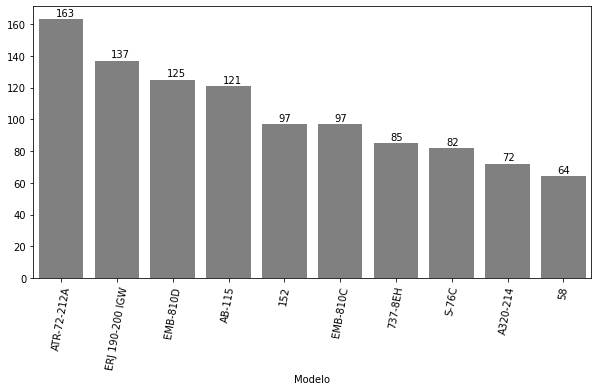

In [ ]:
# gráfico de incidentes por aeronave_modelo - 10+
px = df_inc['aeronave_modelo'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=aeronave, color="grey")
plt.xlabel('Modelo')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+2))

In [ ]:
# Modelo Icao
df_inc.stb.freq(['aeronave_tipo_icao'], thresh=42)

,aeronave_tipo_icao,count,percent,cumulative_count,cumulative_percent
0,PA34,316,9.057036,316,9.057036
1,E190,204,5.846948,520,14.903984
2,AT72,170,4.872456,690,19.776440
3,A320,157,4.499857,847,24.276297
4,AB11,121,3.468042,968,27.744339
5,S76,102,2.923474,1070,30.667813
6,B738,98,2.808828,1168,33.476641
7,C152,95,2.722843,1263,36.199484
8,ULAC,88,2.522213,1351,38.721697
9,BE58,85,2.436228,1436,41.157925


In [ ]:
# Incidentes, por modelo tipo icao
print(df_inc['aeronave_tipo_icao'].value_counts())

PA34    316
E190    204
AT72    170
A320    157
AB11    121
       ... 
C180      1
C177      1
FA10      1
PA18      1
E135      1
Name: aeronave_tipo_icao, Length: 194, dtype: int64


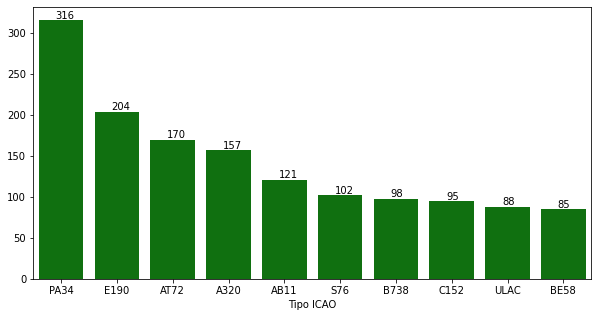

In [ ]:
# gráfico de incidentes por aeronave_tipo_icao - 10+
px = df_inc['aeronave_tipo_icao'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=aeronave, color="green")
plt.xlabel('Tipo ICAO')
plt.ylabel('')
#plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+2))

In [ ]:
df_inc['aeronave_fase_operacao'].value_counts()

POUSO                              635
DECOLAGEM                          528
CRUZEIRO                           511
CORRIDA APÓS POUSO                 424
TÁXI                               396
SUBIDA                             281
APROXIMAÇÃO FINAL                  205
DESCIDA                            116
CIRCUITO DE TRÁFEGO                 91
MANOBRA                             73
ESTACIONAMENTO                      72
INDETERMINADA                       42
OUTRA FASE                          39
ESPECIALIZADA                       28
OPERAÇÃO DE SOLO                    26
ARREMETIDA NO SOLO                  25
PARTIDA DO MOTOR                    18
VOO A BAIXA ALTURA                  12
PROCEDIMENTO DE APROXIMA��O IFR     11
PAIRADO                             10
SAÍDA IFR                            8
ARREMETIDA NO AR                     8
RETA FINAL                           8
CHEQUE DE MOTOR OU ROTOR             6
PUSHBACK                             6
ESPERA                   

In [ ]:
# tabela aeronave fase operacao com %
df_inc.stb.freq(['aeronave_fase_operacao'], thresh=85)

,aeronave_fase_operacao,count,percent,cumulative_count,cumulative_percent
0,POUSO,635,17.678174,635,17.678174
1,DECOLAGEM,528,14.699332,1163,32.377506
2,CRUZEIRO,511,14.226058,1674,46.603563
3,CORRIDA APÓS POUSO,424,11.804009,2098,58.407572
4,TÁXI,396,11.024499,2494,69.432071
5,SUBIDA,281,7.822940,2775,77.255011
6,APROXIMAÇÃO FINAL,205,5.707127,2980,82.962138
7,others,612,17.037862,3592,100.000000


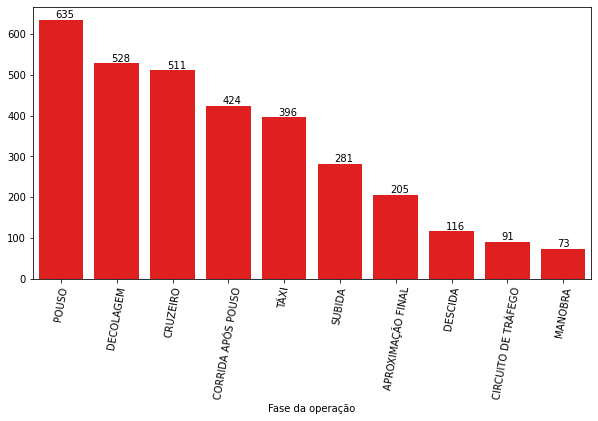

In [ ]:
# gráfico de incidentes por aeronave_fase_operacao
px = df_inc['aeronave_fase_operacao'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=aeronave, color="red")

plt.xlabel('Fase da operação')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+5))


In [ ]:
df_inc['aeronave_nivel_dano'].value_counts()

NENHUM         1833
LEVE           1491
SUBSTANCIAL     255
Name: aeronave_nivel_dano, dtype: int64

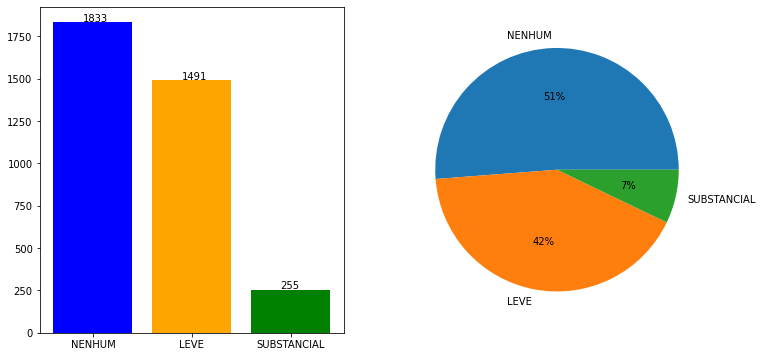

In [ ]:
# gráfico de incidentes por nivel dano - abs e %
px = df_inc['aeronave_nivel_dano'].value_counts()

fig, (cx,dx) = plt.subplots(1,2, figsize=(12,6))
cx.bar(px.index, px.values, color=("blue","orange","green"))
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+5))

# Graf nivel dano - pizza
dx = df_inc['aeronave_nivel_dano'].value_counts().plot(kind='pie', subplots=True,
                                                     label="" ,
                                                    # figsize=(6, 6),
                                                     autopct='%1.0f%%'
                                                     )

In [ ]:
print(df_inc['aeronave_fatalidades_total'].value_counts())

0    3598
Name: aeronave_fatalidades_total, dtype: int64


In [ ]:
df_inc['aeronave_fatalidades_total'].count()

3598

In [ ]:
print(df_inc['aeronave_fatalidades_total'].sum())

0


In [ ]:
# por definição, incidentes não têm fatalidades, mas para confirmar:
print('TOTAL DE AERONAVES ENVOLVIDAS EM INCIDENTES: ' +
      str(df_inc['aeronave_fatalidades_total'].count())
     )

print('INCIDENTES COM FATALIDADES: ' +
      str(df_inc['aeronave_fatalidades_total'][df_inc['aeronave_fatalidades_total'] >= 1].count())
     )


TOTAL DE AERONAVES ENVOLVIDAS EM INCIDENTES: 3598
INCIDENTES COM FATALIDADES: 0


In [ ]:
# mergear tabelas ocorrencia e ocorrencia tipo, pelo cod ocorrencia 1
inner_merged1 = pd.merge(ocorrencia, octipo, on=["codigo_ocorrencia1"], how="inner")

In [ ]:
inner_merged1.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,Dia,Ano,Mes,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
1,39155,39155,39155,39155,INCIDENTE,BELO HORIZONTE,MG,2010-05-02,1,2,2010,5,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,39156,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,2010-10-01,1,1,2010,10,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,39158,39158,39158,INCIDENTE,BELÉM,PA,2010-01-28,1,28,2010,1,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,39176,39176,39176,INCIDENTE,SÃO LUÍS,MA,2010-05-02,1,2,2010,5,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP


In [ ]:
inner_merged1.shape

(5317, 15)

In [ ]:
# criar df pra tabela nova, com filtro pelos diferentes de acidentes (incidentes e incidentes graves)
df_inc1 = inner_merged1[inner_merged1['ocorrencia_classificacao'] != 'ACIDENTE']

In [ ]:
df_inc1.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,Dia,Ano,Mes,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
1,39155,39155,39155,39155,INCIDENTE,BELO HORIZONTE,MG,2010-05-02,1,2,2010,5,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,39156,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,2010-10-01,1,1,2010,10,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,39158,39158,39158,INCIDENTE,BELÉM,PA,2010-01-28,1,28,2010,1,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,39176,39176,39176,INCIDENTE,SÃO LUÍS,MA,2010-05-02,1,2,2010,5,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
5,39178,39178,39178,39178,INCIDENTE,CAMPINAS,SP,2010-08-02,1,2,2010,8,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP


In [ ]:
df_inc1.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'ocorrencia_classificacao', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_dia', 'total_aeronaves_envolvidas', 'Dia',
       'Ano', 'Mes', 'ocorrencia_tipo', 'ocorrencia_tipo_categoria',
       'taxonomia_tipo_icao'],
      dtype='object')

In [ ]:
df_inc1.shape

(3580, 15)

In [ ]:
df_inc1.count()

codigo_ocorrencia             3580
codigo_ocorrencia1            3580
codigo_ocorrencia2            3580
codigo_ocorrencia3            3580
ocorrencia_classificacao      3580
ocorrencia_cidade             3580
ocorrencia_uf                 3580
ocorrencia_dia                3580
total_aeronaves_envolvidas    3580
Dia                           3580
Ano                           3580
Mes                           3580
ocorrencia_tipo               3580
ocorrencia_tipo_categoria     3580
taxonomia_tipo_icao           3580
dtype: int64

In [ ]:
# estat básicas
df_inc1.describe()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,total_aeronaves_envolvidas,Dia,Ano,Mes
count,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000
mean,56113.500279,56113.500279,56113.500279,56113.500279,1.013966,15.655587,2014.072905,6.494693
std,13051.796072,13051.796072,13051.796072,13051.796072,0.122036,8.781606,2.880694,3.421122
min,39155.000000,39155.000000,39155.000000,39155.000000,1.000000,1.000000,2010.000000,1.000000
25%,45931.750000,45931.750000,45931.750000,45931.750000,1.000000,8.000000,2012.000000,3.000000
50%,51468.000000,51468.000000,51468.000000,51468.000000,1.000000,16.000000,2014.000000,7.000000
75%,66430.500000,66430.500000,66430.500000,66430.500000,1.000000,23.000000,2017.000000,9.000000
max,79203.000000,79203.000000,79203.000000,79203.000000,3.000000,31.000000,2019.000000,12.000000


In [ ]:
# Qtd de codigos de incidentes únicos
df_inc1.codigo_ocorrencia1.nunique()

3548

In [ ]:
# incidentes com mais de 1 tipo de ocorrencia
df_inc1.codigo_ocorrencia1.value_counts().head(35)

66444    3
45582    2
44244    2
77695    2
78263    2
41411    2
42960    2
45752    2
40269    2
45753    2
46446    2
78575    2
46024    2
77689    2
43459    2
78945    2
46043    2
78990    2
78110    2
46281    2
43668    2
52471    2
42718    2
45932    2
46705    2
46712    2
45754    2
77789    2
45654    2
53552    2
42760    2
46783    1
66860    1
45803    1
45791    1
Name: codigo_ocorrencia1, dtype: int64

In [ ]:
print(df_inc1['ocorrencia_tipo'].value_counts())

ESTOURO DE PNEU                                       563
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE    488
FALHA DO MOTOR EM VOO                                 320
COLISÃO COM AVE                                       267
OUTROS                                                255
                                                     ... 
PERDA DE SEPARA��O / COLIS�O EM VOO                     1
RELACIONADO COM SECURITY                                1
CAUSADO POR RICOCHETE                                   1
EXPLOS�O                                                1
COM LAN�AMENTO DE PESSOAS                               1
Name: ocorrencia_tipo, Length: 73, dtype: int64


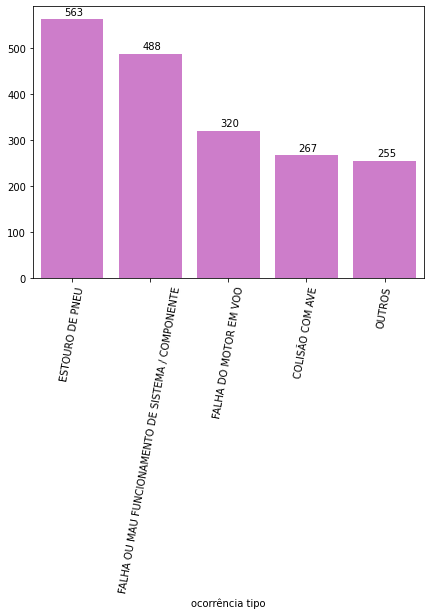

In [ ]:
# gráfico de incidentes por ocorrencia_tipo - 5+
px = df_inc1['ocorrencia_tipo'].value_counts().head(5)

fig = plt.figure(figsize=(7,5))
cx = sns.barplot(px.index, px.values,data=octipo, color="orchid")

plt.xlabel('ocorrência tipo')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+10))

In [ ]:
df_inc1['ocorrencia_tipo_categoria'].value_counts()

FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | ESTOURO DE PNEU         563
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE                           488
FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO                  320
COLISÃO COM AVE                                                              267
OUTROS                                                                       255
                                                                            ... 
PERDA DE SEPARA��O / COLIS�O EM VOO | PERDA DE SEPARA��O / COLIS�O EM VOO      1
OUTROS | COM LAN�AMENTO DE PESSOAS                                             1
RELACIONADO COM SECURITY                                                       1
OUTROS | HIP�XIA                                                               1
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | EXPLOS�O                  1
Name: ocorrencia_tipo_categoria, Length: 73, dtype: int64

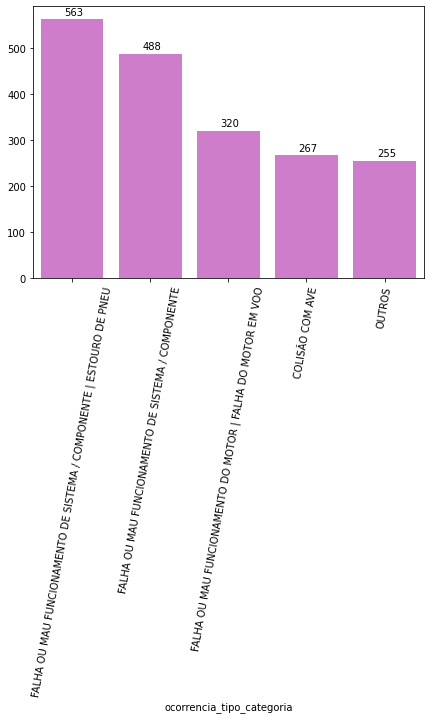

In [ ]:
# gráfico de incidentes por ocorrencia_tipo_categoria - 5+
px = df_inc1['ocorrencia_tipo_categoria'].value_counts().head(5)

fig = plt.figure(figsize=(7,5))
cx = sns.barplot(px.index, px.values,data=octipo, color="orchid")

plt.xlabel('ocorrencia_tipo_categoria')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+10))

In [ ]:
# mergear tabelas ocorrencia e fator contribuinte, pelo cod ocorrencia 3
inner_merged2 = pd.merge(ocorrencia, fatorc, on=["codigo_ocorrencia3"], how="inner")

In [ ]:
inner_merged2.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,Dia,Ano,Mes,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [ ]:
inner_merged2.shape

(3717, 16)

In [ ]:
# criar df pra tabela nova, com filtro pelos diferentes de acidentes
df_inc2 = inner_merged2[inner_merged2['ocorrencia_classificacao'] != 'ACIDENTE']

In [ ]:
df_inc2.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,Dia,Ano,Mes,fator_nome,fator_aspecto,fator_condicionante,fator_area
6,39156,39156,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,2010-10-01,1,1,2010,10,MANUTENÇÃO DE AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL
7,39156,39156,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,2010-10-01,1,1,2010,10,PLANEJAMENTO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
8,39156,39156,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,2010-10-01,1,1,2010,10,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
72,39385,39385,39385,39385,INCIDENTE GRAVE,BRASÍLIA,DF,2010-02-21,1,21,2010,2,DESVIO DE NAVEGA��O,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
73,39385,39385,39385,39385,INCIDENTE GRAVE,BRASÍLIA,DF,2010-02-21,1,21,2010,2,ESQUECIMENTO DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [ ]:
df_inc2.ocorrencia_classificacao.nunique()

2

In [ ]:
df_inc2.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'ocorrencia_classificacao', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_dia', 'total_aeronaves_envolvidas', 'Dia',
       'Ano', 'Mes', 'fator_nome', 'fator_aspecto', 'fator_condicionante',
       'fator_area'],
      dtype='object')

In [ ]:
df_inc2.shape

(769, 16)

In [ ]:
df_inc2.count()

codigo_ocorrencia             769
codigo_ocorrencia1            769
codigo_ocorrencia2            769
codigo_ocorrencia3            769
ocorrencia_classificacao      769
ocorrencia_cidade             769
ocorrencia_uf                 769
ocorrencia_dia                769
total_aeronaves_envolvidas    769
Dia                           769
Ano                           769
Mes                           769
fator_nome                    769
fator_aspecto                 736
fator_condicionante           687
fator_area                    736
dtype: int64

In [ ]:
df_inc2.describe()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,total_aeronaves_envolvidas,Dia,Ano,Mes
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,50263.037711,50263.037711,50263.037711,50263.037711,1.011704,14.592978,2012.879064,6.778934
std,8684.591298,8684.591298,8684.591298,8684.591298,0.107618,8.776419,2.190698,3.174692
min,39156.000000,39156.000000,39156.000000,39156.000000,1.000000,1.000000,2010.000000,1.000000
25%,44996.000000,44996.000000,44996.000000,44996.000000,1.000000,7.000000,2011.000000,4.000000
50%,49618.000000,49618.000000,49618.000000,49618.000000,1.000000,15.000000,2013.000000,8.000000
75%,52694.000000,52694.000000,52694.000000,52694.000000,1.000000,22.000000,2014.000000,9.000000
max,78497.000000,78497.000000,78497.000000,78497.000000,2.000000,31.000000,2019.000000,12.000000


In [ ]:
# Qtd de codigos de incidentes únicos
df_inc2.codigo_ocorrencia3.nunique()

266

In [ ]:
# Qts incidentes com mais de um fator
df_inc2.codigo_ocorrencia3.value_counts().head(15)

53358    15
51440    12
50097    12
45553    12
49618    12
40732    10
51442     9
51444     8
77320     8
41898     8
47938     8
78497     8
53103     8
51443     7
53262     7
Name: codigo_ocorrencia3, dtype: int64

In [ ]:
print(df_inc2['fator_nome'].value_counts())

JULGAMENTO DE PILOTAGEM                104
APLICAÇÃO DE COMANDOS                   91
MANUTENÇÃO DE AERONAVE                  76
SUPERVISÃO GERENCIAL                    66
PLANEJAMENTO DE VOO                     39
COORDENAÇÃO DE CABINE                   33
POUCA EXPERIÊNCIA DO PILOTO             33
ESQUECIMENTO DO PILOTO                  29
INFRAESTRUTURA AEROPORTUÁRIA            26
PROCESSO DECISÓRIO                      21
INSTRUÇÃO                               21
CONDI��ES METEOROL�GICAS ADVERSAS       19
PERCEPÇÃO                               19
ATITUDE                                 15
INDISCIPLINA DE VOO                     14
OUTRO FATOR                             14
PROCESSOS ORGANIZACIONAIS               14
PLANEJAMENTO GERENCIAL                  13
ATEN��O                                 13
FORMA��O, CAPACITA��O E TREINAMENTO     10
SISTEMAS DE APOIO                       10
DIN�MICA DE EQUIPE                       8
INFLU�NCIA DO MEIO AMBIENTE              7
MOTIVA��O  

In [ ]:
# tabela fator nome com %
df_inc2.stb.freq(['fator_nome'], thresh=50)

,fator_nome,count,percent,cumulative_count,cumulative_percent
0,JULGAMENTO DE PILOTAGEM,104,13.524057,104,13.524057
1,APLICAÇÃO DE COMANDOS,91,11.833550,195,25.357607
2,MANUTENÇÃO DE AERONAVE,76,9.882965,271,35.240572
3,SUPERVISÃO GERENCIAL,66,8.582575,337,43.823147
4,PLANEJAMENTO DE VOO,39,5.071521,376,48.894668
5,others,393,51.105332,769,100.000000


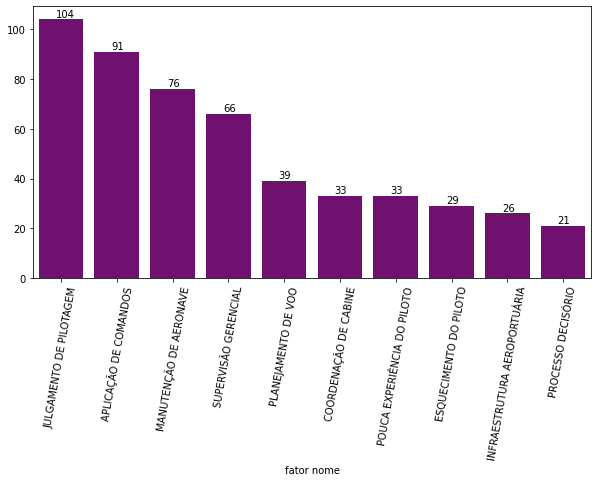

In [ ]:
# Incidentes por fator_nome
px = df_inc2['fator_nome'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=fatorc, color="purple")

plt.xlabel('fator nome')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+1))

In [ ]:
print(df_inc2['fator_aspecto'].value_counts())

DESEMPENHO DO SER HUMANO           536
ASPECTO PSICOLÓGICO                144
INFRAESTRUTURA AEROPORTUÁRIA        26
ASPECTO MÉDICO                      11
ERGONOMIA                            7
INFRAESTRUTURA DE TRÁFEGO AÉREO      4
ASPECTO DO PROJETO                   3
ASPECTO DA FABRICAÇÃO                3
ASPECTO DO MANUSEIO MATERIAL         2
Name: fator_aspecto, dtype: int64


In [ ]:
# tabela fator nome com %
df_inc2.stb.freq(['fator_aspecto'], thresh=95)

,fator_aspecto,count,percent,cumulative_count,cumulative_percent
0,DESEMPENHO DO SER HUMANO,536,72.826087,536,72.826087
1,ASPECTO PSICOLÓGICO,144,19.565217,680,92.391304
2,others,56,7.608696,736,100.000000


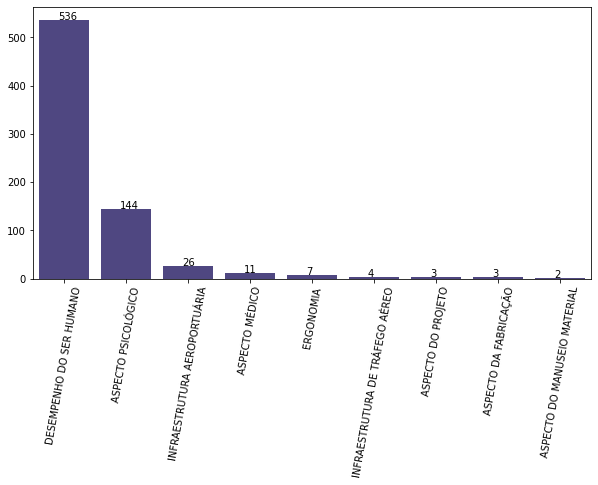

In [ ]:
# Gráfico de aspectos do FC
px = df_inc2['fator_aspecto'].value_counts()

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=fatorc, color="darkslateblue")
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))


In [ ]:
print(df_inc2['fator_condicionante'].value_counts())

OPERAÇÃO DA AERONAVE                      449
INDIVIDUAL                                 83
MANUTENÇÃO DA AERONAVE                     76
ORGANIZACIONAL                             50
PSICOSSOCIAL                               18
PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO     11
Name: fator_condicionante, dtype: int64


In [ ]:
# tabela fator nome com %
df_inc2.stb.freq(['fator_condicionante'], thresh=80)

,fator_condicionante,count,percent,cumulative_count,cumulative_percent
0,OPERAÇÃO DA AERONAVE,449,65.356623,449,65.356623
1,INDIVIDUAL,83,12.081514,532,77.438137
2,others,155,22.561863,687,100.000000


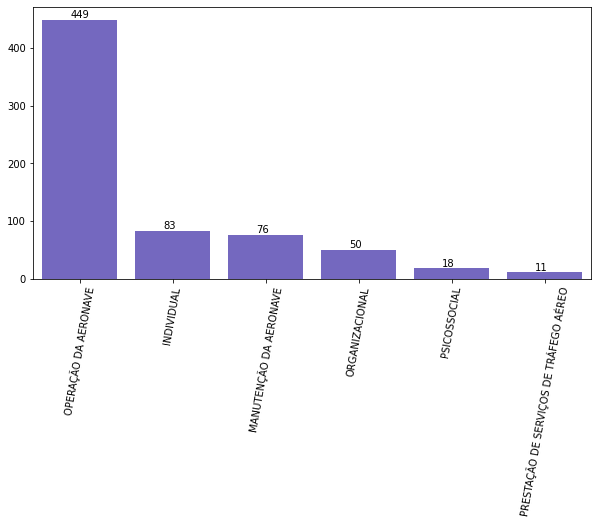

In [ ]:
# Por fator condicionantes
px = df_inc2['fator_condicionante'].value_counts()

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=fatorc, color="slateblue")
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+3))

In [ ]:
print(df_inc2['fator_area'].value_counts())

FATOR OPERACIONAL    566
FATOR HUMANO         162
FATOR MATERIAL         8
Name: fator_area, dtype: int64


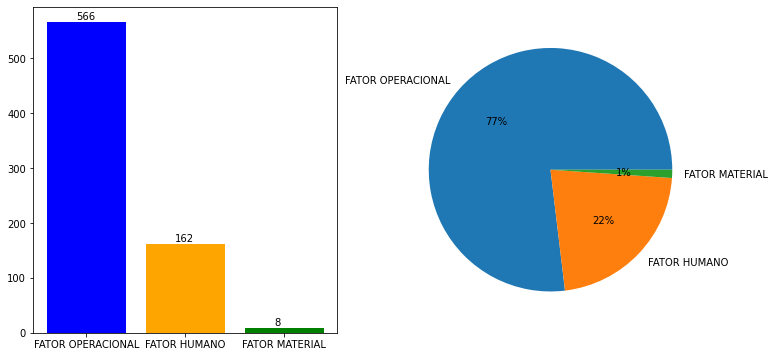

In [ ]:
# Por area
px = df_inc2['fator_area'].value_counts()

fig, (cx,dx) = plt.subplots(1,2, figsize=(12,6))
#cx.bar(px.index, px.values, color=("red","blue","purple"))
cx.bar(px.index, px.values, color=("blue","orange","green"))
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+5))

# Graf nivel dano - pizza
dx = df_inc2['fator_area'].value_counts().plot(kind='pie', subplots=True,
                                                     label="" ,
                                                    # figsize=(6, 6),
                                                     autopct='%1.0f%%'
                                                     )

## **Estatística descritiva dos acidentes**

A análise dos acidentes, a partir de merge das tabelas, poderá responder as seguintes questões:

1) Quantos foram os acidentes, por ano?

2) Quantos são os acidentes por UF?

3) Em quantos acidentes houve fatalidade?

4) Quais os tipos de ocorrência mais e menos frequentes?

5) Quais os modelos e tipos de aeronaves mais frequentes?

6) Quantos acidentes houve, pela fase da operação?

7) Quais foram os níveis de danos, encontrados nos acidentes?

8) Quantas fatalidades ocorreram, no período?

9) Quais foram os fatores contribuintes que mais ocorreram para acidentes?

In [ ]:
#df de acidentes
ac = ocorrencia[ocorrencia['ocorrencia_classificacao'] == 'ACIDENTE']

In [ ]:
#por_ano_ac = ocorrencia.groupby(ac['Ano'])['codigo_ocorrencia'].count()
#por_ano_ac

In [ ]:
ac['Ano'].count()

1697

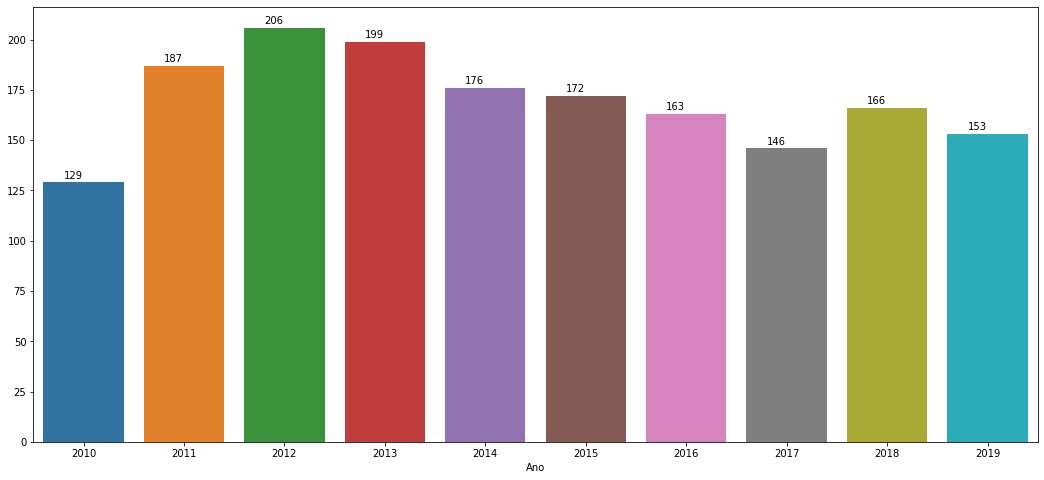

In [ ]:
# acidentes por ano - palette
px = ac.Ano.value_counts()

fig = plt.figure(figsize=(18,8))
cx = sns.barplot(px.index, px.values,data=ocorrencia)
plt.xlabel('Ano')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+2))

In [ ]:
#qtd de acidentes
print('ACIDENTES: ' +
      str(ac['ocorrencia_classificacao'][ac['ocorrencia_classificacao'] == 'ACIDENTE'].count())
     )

ACIDENTES: 1697


In [ ]:
# acid por cidade
ac['ocorrencia_cidade'].value_counts()

RIO DE JANEIRO        34
ITAITUBA              26
GOIÂNIA               26
SÃO PAULO             24
MANAUS                21
                      ..
PLANALTO DA SERRA      1
FRONTEIRA              1
XINGUARA               1
NOVA INDEPEND�NCIA     1
PRAD�POLIS             1
Name: ocorrencia_cidade, Length: 814, dtype: int64

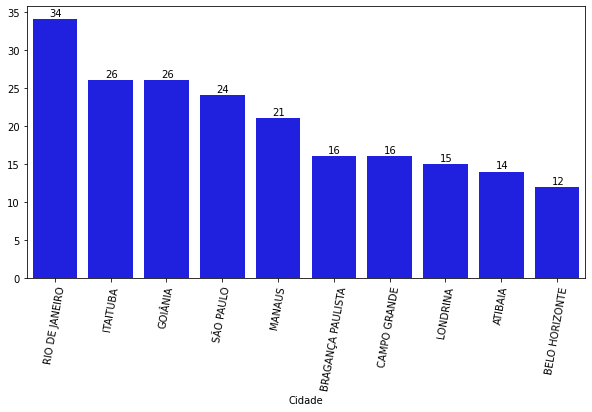

In [ ]:
# gráfico de acidentes por cidade - 10+
px = ac['ocorrencia_cidade'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=ocorrencia, color="blue")

plt.xlabel('Cidade')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+0.4))

In [ ]:
# acid por UF
ac['ocorrencia_uf'].value_counts()

SP    357
RS    159
MT    147
PR    136
MG    127
GO    123
PA    119
MS     74
RJ     70
AM     66
SC     60
BA     58
RR     30
MA     29
CE     22
PE     19
TO     18
PI     14
AC     12
RO     10
ES      9
SE      8
DF      7
PB      7
AL      5
AP      4
RN      4
Name: ocorrencia_uf, dtype: int64

In [ ]:
# acidentes por UF
ac.stb.freq(['ocorrencia_uf'], thresh=50)

,ocorrencia_uf,count,percent,cumulative_count,cumulative_percent
0,SP,357,21.074380,357,21.074380
1,RS,159,9.386068,516,30.460449
2,MT,147,8.677686,663,39.138135
3,PR,136,8.028335,799,47.166470
4,others,895,52.833530,1694,100.000000


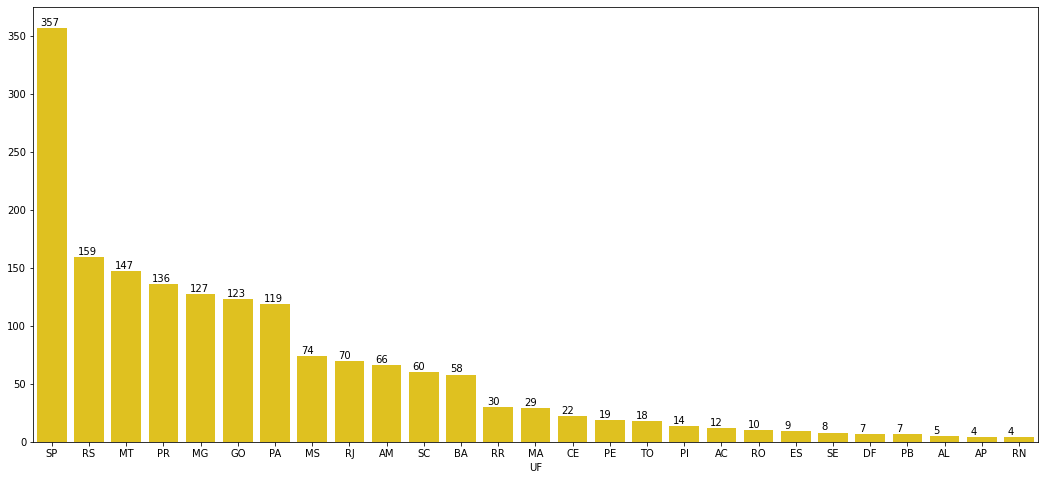

In [ ]:
# Acidentes por UF
px = ac.ocorrencia_uf.value_counts()


fig = plt.figure(figsize=(18,8))
cx = sns.barplot(px.index, px.values,data=ocorrencia, color="gold")
plt.xlabel('UF')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))

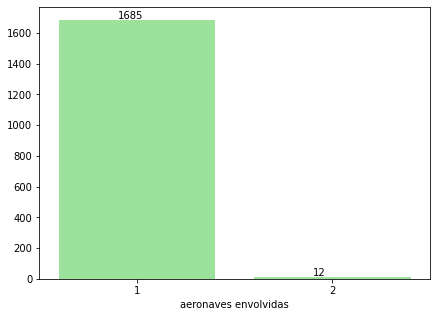

In [ ]:
# gráfico de acidentes por aeronaves envolvidas
px = ac.total_aeronaves_envolvidas.value_counts()


fig = plt.figure(figsize=(7,5))
cx = sns.barplot(px.index, px.values,data=ocorrencia, color="lightgreen")
plt.xlabel('aeronaves envolvidas')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))

In [ ]:
# Como já teve mergear tabelas ocorrencia e aeronave, pelo cod ocorrencia 2, não precisa
#inner_merged = pd.merge(ocorrencia, aeronave, on=["codigo_ocorrencia2"], how="inner")

In [ ]:
# criar df pra tabela nova, com filtro pelos acidentes
df_ac = inner_merged[inner_merged['ocorrencia_classificacao'] == 'ACIDENTE']

In [ ]:
df_ac.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,Dia,Ano,Mes,aeronave_tipo_veiculo,aeronave_modelo,aeronave_tipo_icao,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,AVIÃO,EMB-711A,P28R,DECOLAGEM,SUBSTANCIAL,0
6,39235,39235,39235,39235,ACIDENTE,ITUMBIARA,GO,2010-06-02,1,2,2010,6,AVIÃO,A188B,C188,DECOLAGEM,DESTRUÍDA,1
7,39275,39275,39275,39275,ACIDENTE,SÃO PAULO,SP,2010-10-02,1,2,2010,10,HELICÓPTERO,AS 350 BA,NaN,CRUZEIRO,DESTRUÍDA,1
8,39295,39295,39295,39295,ACIDENTE,RIO DE JANEIRO,RJ,2010-06-02,1,2,2010,6,ULTRALEVE,RV-9,ULAC,APROXIMAÇÃO FINAL,SUBSTANCIAL,2
9,39315,39315,39315,39315,ACIDENTE,CANUTAMA,AM,2010-01-15,1,15,2010,1,HELICÓPTERO,HB-350B,AS50,CRUZEIRO,NaN,2


In [ ]:
df_ac.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'ocorrencia_classificacao', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_dia', 'total_aeronaves_envolvidas', 'Dia',
       'Ano', 'Mes', 'aeronave_tipo_veiculo', 'aeronave_modelo',
       'aeronave_tipo_icao', 'aeronave_fase_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

In [ ]:
df_ac.shape
# Tem 1709 obs, pois há 12 acidentes que envolveram 2 aeronaves

(1709, 18)

In [ ]:
df_ac.count()

codigo_ocorrencia             1709
codigo_ocorrencia1            1709
codigo_ocorrencia2            1709
codigo_ocorrencia3            1709
ocorrencia_classificacao      1709
ocorrencia_cidade             1709
ocorrencia_uf                 1706
ocorrencia_dia                1709
total_aeronaves_envolvidas    1709
Dia                           1709
Ano                           1709
Mes                           1709
aeronave_tipo_veiculo         1675
aeronave_modelo               1657
aeronave_tipo_icao            1625
aeronave_fase_operacao        1703
aeronave_nivel_dano           1684
aeronave_fatalidades_total    1709
dtype: int64

In [ ]:
# estat básicas
df_ac.describe()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,total_aeronaves_envolvidas,Dia,Ano,Mes,aeronave_fatalidades_total
count,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000
mean,57194.899356,57194.899356,57194.899356,57194.899356,1.014043,15.643651,2014.397308,6.457578,0.482738
std,13019.377982,13019.377982,13019.377982,13019.377982,0.117704,8.940474,2.776746,3.493233,1.173662
min,39115.000000,39115.000000,39115.000000,39115.000000,1.000000,1.000000,2010.000000,1.000000,0.000000
25%,46257.000000,46257.000000,46257.000000,46257.000000,1.000000,8.000000,2012.000000,3.000000,0.000000
50%,52639.000000,52639.000000,52639.000000,52639.000000,1.000000,16.000000,2014.000000,7.000000,0.000000
75%,66550.000000,66550.000000,66550.000000,66550.000000,1.000000,23.000000,2017.000000,9.000000,0.000000
max,79227.000000,79227.000000,79227.000000,79227.000000,2.000000,31.000000,2019.000000,12.000000,16.000000


In [ ]:
# Qtd de codigos de acidentes únicos
df_ac.codigo_ocorrencia2.nunique()

1697

In [ ]:
# acidentes com códigos repetidos (envolvimento de mais de uma aeronave)
df_ac.codigo_ocorrencia2.value_counts().head(15)

46255    2
60947    2
52539    2
78031    2
51433    2
65921    2
43869    2
51436    2
51653    2
50801    2
65445    2
44944    2
60861    1
46512    1
46514    1
Name: codigo_ocorrencia2, dtype: int64

In [ ]:
print(df_ac['aeronave_tipo_veiculo'].value_counts())

AVIÃO          1223
ULTRALEVE       221
HELICÓPTERO     206
PLANADOR         10
ANFÍBIO           7
TRIKE             5
DIRIGÍVEL         2
BALÃO             1
Name: aeronave_tipo_veiculo, dtype: int64


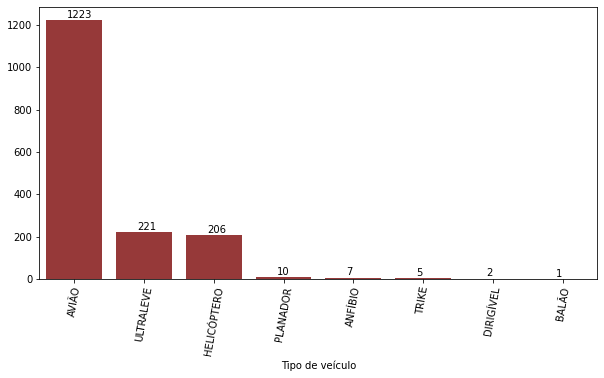

In [ ]:
# Por aeronave_tipo_veiculo'
px = df_ac['aeronave_tipo_veiculo'].value_counts()

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=aeronave, color="brown")
plt.xlabel('Tipo de veículo')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+10))

In [ ]:
# Modelo Icao
df_ac.stb.freq(['aeronave_tipo_icao'], thresh=50)

,aeronave_tipo_icao,count,percent,cumulative_count,cumulative_percent
0,IPAN,235,14.461538,235,14.461538
1,ULAC,202,12.430769,437,26.892308
2,PA34,79,4.861538,516,31.753846
3,ZZZZ,60,3.692308,576,35.446154
4,R44,57,3.507692,633,38.953846
5,C210,57,3.507692,690,42.461538
6,C188,51,3.138462,741,45.600000
7,AB11,46,2.830769,787,48.430769
8,others,838,51.569231,1625,100.000000


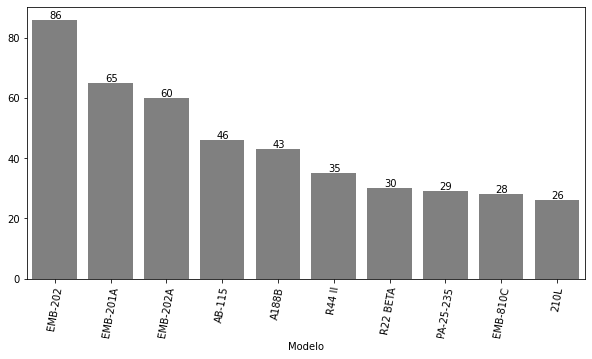

In [ ]:
# gráfico de acidentes por aeronave_modelo
px = df_ac['aeronave_modelo'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=aeronave, color="grey")
plt.xlabel('Modelo')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+.5))

In [ ]:
# Acidentes, por tipo icao
print(df_ac['aeronave_tipo_icao'].value_counts())

IPAN    235
ULAC    202
PA34     79
ZZZZ     60
C210     57
       ... 
PSW4      1
CP10      1
PA24      1
C82R      1
DV20      1
Name: aeronave_tipo_icao, Length: 152, dtype: int64


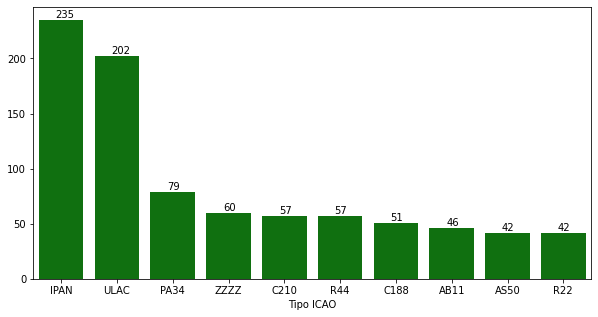

In [ ]:
# gráfico de acidentes por aeronave_tipo_icao - 10+
px = df_ac['aeronave_tipo_icao'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=aeronave, color="green")
plt.xlabel('Tipo ICAO')
plt.ylabel('')
#plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+2))

In [ ]:
df_ac['aeronave_fase_operacao'].value_counts()

DECOLAGEM                   332
POUSO                       280
CRUZEIRO                    242
CORRIDA APÓS POUSO          137
ESPECIALIZADA               134
MANOBRA                     122
APROXIMAÇÃO FINAL            64
SUBIDA                       62
INDETERMINADA                56
OUTRA FASE                   46
CIRCUITO DE TRÁFEGO          45
DESCIDA                      42
VOO A BAIXA ALTURA           37
TÁXI                         21
ARREMETIDA NO AR             18
ARREMETIDA NO SOLO           17
PARTIDA DO MOTOR             10
PAIRADO                       8
DECOLAGEM VERTICAL            8
RETA FINAL                    7
OPERAÇÃO DE SOLO              6
ESTACIONAMENTO                3
DESCIDA DESCONTROLADA         2
CHEQUE DE MOTOR OU ROTOR      2
SAÍDA IFR                     1
DESCIDA DE EMERGÊNCIA         1
Name: aeronave_fase_operacao, dtype: int64

In [ ]:
# tabela aeronave fase operacao com %
df_ac.stb.freq(['aeronave_fase_operacao'])

,aeronave_fase_operacao,count,percent,cumulative_count,cumulative_percent
0,DECOLAGEM,332,19.495009,332,19.495009
1,POUSO,280,16.441574,612,35.936583
2,CRUZEIRO,242,14.210217,854,50.146800
3,CORRIDA APÓS POUSO,137,8.044627,991,58.191427
4,ESPECIALIZADA,134,7.868467,1125,66.059894
5,MANOBRA,122,7.163829,1247,73.223723
6,APROXIMAÇÃO FINAL,64,3.758074,1311,76.981797
7,SUBIDA,62,3.640634,1373,80.622431
8,INDETERMINADA,56,3.288315,1429,83.910746
9,OUTRA FASE,46,2.701116,1475,86.611861


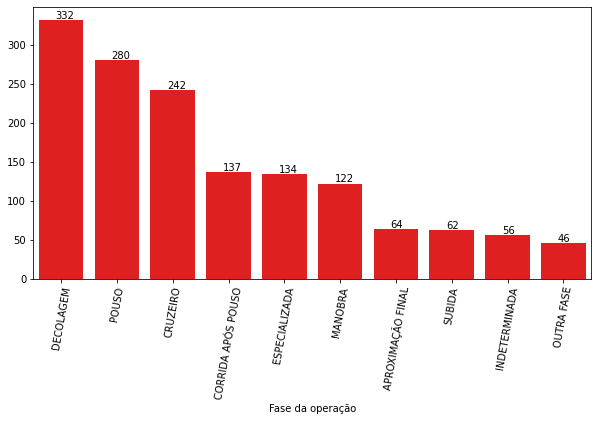

In [ ]:
# acidente por aeronave_fase_operacao'
px = df_ac['aeronave_fase_operacao'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=aeronave, color="red")

plt.xlabel('Fase da operação')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+2))

In [ ]:
df_ac['aeronave_nivel_dano'].value_counts()

SUBSTANCIAL    1270
DESTRUÍDA       331
LEVE             58
NENHUM           25
Name: aeronave_nivel_dano, dtype: int64

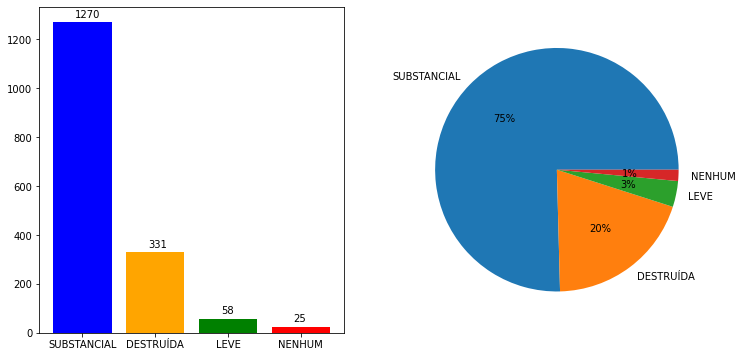

In [ ]:
# acidente por nivel dano
px = df_ac['aeronave_nivel_dano'].value_counts()

fig, (cx,dx) = plt.subplots(1,2, figsize=(12,6))
#cx.bar(px.index, px.values, color=("red","blue","purple","grey"))
cx.bar(px.index, px.values, color=("blue","orange","green","red"))
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+20))

# Graf nivel dano - pizza
dx = df_ac['aeronave_nivel_dano'].value_counts().plot(kind='pie', subplots=True,
                                                     label="" ,
                                                    # figsize=(6, 6),
                                                     autopct='%1.0f%%'
                                                     )

In [ ]:
print(df_ac['aeronave_fatalidades_total'].value_counts())

0     1307
1      200
2      112
3       30
4       28
5       17
6        6
7        4
8        3
16       1
10       1
Name: aeronave_fatalidades_total, dtype: int64


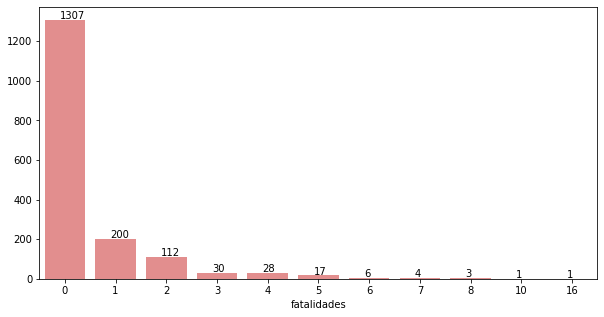

In [ ]:
# Graf fatalidades da aeron - barra


# Por fatalidades da aeron
px = df_ac['aeronave_fatalidades_total'].value_counts()

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=aeronave, color="lightcoral")
plt.xlabel('fatalidades')
plt.ylabel('')
#plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+5))

In [ ]:
df_ac['aeronave_fatalidades_total'].count()

1709

In [ ]:
print(df_ac['aeronave_fatalidades_total'].sum())

825


In [ ]:
402/1709

print('TOTAL DE AERONAVES ENVOLVIDAS EM ACIDENTES: ' +
      str(df_ac['aeronave_fatalidades_total'].count())
     )

print('ACIDENTE COM FATALIDADES: ' +
      str(df_ac['aeronave_fatalidades_total'][df_ac['aeronave_fatalidades_total'] >= 1].count())
     )

print('FATALIDADES NOS ACIDENTES: ' +
      str(df_ac['aeronave_fatalidades_total'].sum())
     )

TOTAL DE AERONAVES ENVOLVIDAS EM ACIDENTES: 1709
ACIDENTE COM FATALIDADES: 402
FATALIDADES NOS ACIDENTES: 825


In [ ]:
# Fatalidades por Uf
df_ac.stb.freq(['ocorrencia_uf'], value='aeronave_fatalidades_total', thresh=70)

,ocorrencia_uf,aeronave_fatalidades_total,percent,cumulative_aeronave_fatalidades_total,cumulative_percent
0,SP,149,18.060606,149,18.060606
1,PA,91,11.030303,240,29.090909
2,MG,83,10.060606,323,39.151515
3,MT,66,8.000000,389,47.151515
4,PR,63,7.636364,452,54.787879
5,GO,63,7.636364,515,62.424242
6,AM,58,7.030303,573,69.454545
7,others,252,30.545455,825,100.000000


In [ ]:
# Como já teve mergear tabelas ocorrencia e ocorrencia tipo, pelo cod ocorrencia 1, não precisa
#inner_merged1 = pd.merge(ocorrencia, octipo, on=["codigo_ocorrencia1"], how="inner")

In [ ]:
# criar df pra tabela nova, com filtro pelos acidentes
df_ac1 = inner_merged1[inner_merged1['ocorrencia_classificacao'] == 'ACIDENTE']

In [ ]:
df_ac1.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,Dia,Ano,Mes,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
6,39235,39235,39235,39235,ACIDENTE,ITUMBIARA,GO,2010-06-02,1,2,2010,6,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I
7,39275,39275,39275,39275,ACIDENTE,SÃO PAULO,SP,2010-10-02,1,2,2010,10,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
8,39295,39295,39295,39295,ACIDENTE,RIO DE JANEIRO,RJ,2010-06-02,1,2,2010,6,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I
9,39315,39315,39315,39315,ACIDENTE,CANUTAMA,AM,2010-01-15,1,15,2010,1,OUTROS,OUTROS,OTHR


In [ ]:
df_ac1.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'ocorrencia_classificacao', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_dia', 'total_aeronaves_envolvidas', 'Dia',
       'Ano', 'Mes', 'ocorrencia_tipo', 'ocorrencia_tipo_categoria',
       'taxonomia_tipo_icao'],
      dtype='object')

In [ ]:
df_ac1.shape

(1737, 15)

In [ ]:
df_ac1.count()

codigo_ocorrencia             1737
codigo_ocorrencia1            1737
codigo_ocorrencia2            1737
codigo_ocorrencia3            1737
ocorrencia_classificacao      1737
ocorrencia_cidade             1737
ocorrencia_uf                 1734
ocorrencia_dia                1737
total_aeronaves_envolvidas    1737
Dia                           1737
Ano                           1737
Mes                           1737
ocorrencia_tipo               1737
ocorrencia_tipo_categoria     1737
taxonomia_tipo_icao           1737
dtype: int64

In [ ]:
df_ac1.describe()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,total_aeronaves_envolvidas,Dia,Ano,Mes
count,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000
mean,57146.827864,57146.827864,57146.827864,57146.827864,1.006908,15.634427,2014.378238,6.470927
std,13096.425346,13096.425346,13096.425346,13096.425346,0.082853,8.942110,2.800849,3.496112
min,39115.000000,39115.000000,39115.000000,39115.000000,1.000000,1.000000,2010.000000,1.000000
25%,46178.000000,46178.000000,46178.000000,46178.000000,1.000000,8.000000,2012.000000,3.000000
50%,52634.000000,52634.000000,52634.000000,52634.000000,1.000000,16.000000,2014.000000,7.000000
75%,66585.000000,66585.000000,66585.000000,66585.000000,1.000000,23.000000,2017.000000,9.000000
max,79227.000000,79227.000000,79227.000000,79227.000000,2.000000,31.000000,2019.000000,12.000000


In [ ]:
# Qtd de codigos de incidentes únicos
df_ac1.codigo_ocorrencia1.nunique()

1697

In [ ]:
df_ac1.codigo_ocorrencia1.value_counts().head(15)

78655    2
46038    2
53626    2
77696    2
78397    2
43472    2
46592    2
46337    2
45730    2
78749    2
46048    2
40793    2
79102    2
42386    2
45524    2
Name: codigo_ocorrencia1, dtype: int64

In [ ]:
print(df_ac1['ocorrencia_tipo'].value_counts())

PERDA DE CONTROLE EM VOO                              321
FALHA DO MOTOR EM VOO                                 313
PERDA DE CONTROLE NO SOLO                             220
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO     118
INDETERMINADO                                          90
PANE SECA                                              69
COM TREM DE POUSO                                      62
OUTROS                                                 61
EXCURS�O DE PISTA                                      57
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     52
OPERA��O A BAIXA ALTITUDE                              45
POUSO BRUSCO                                           36
VOO CONTROLADO CONTRA O TERRENO                        31
POUSO LONGO                                            30
POUSO SEM TREM                                         29
POUSO EM LOCAL N�O PREVISTO                            27
COLIS�O COM OBST�CULOS NO SOLO                         23
CAUSADO POR FE

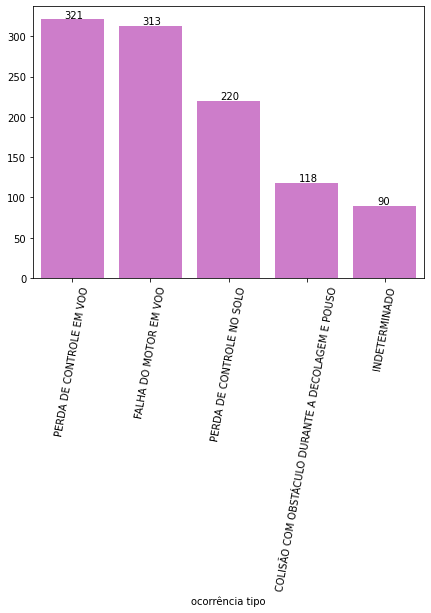

In [ ]:
# gráfico de acidentes por ocorrencia_tipo - 5+
px = df_ac1['ocorrencia_tipo'].value_counts().head(5)

fig = plt.figure(figsize=(7,5))
cx = sns.barplot(px.index, px.values,data=octipo, color="orchid")

plt.xlabel('ocorrência tipo')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+2))

In [ ]:
df_ac1['ocorrencia_tipo_categoria'].value_counts()

PERDA DE CONTROLE EM VOO                                                                            321
FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO                                         313
PERDA DE CONTROLE NO SOLO                                                                           220
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO                                                   118
INDETERMINADO                                                                                        90
COMBUSTÍVEL | PANE SECA                                                                              69
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | COM TREM DE POUSO                               62
OUTROS                                                                                               61
EXCURS�O DE PISTA                                                                                    57
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE              

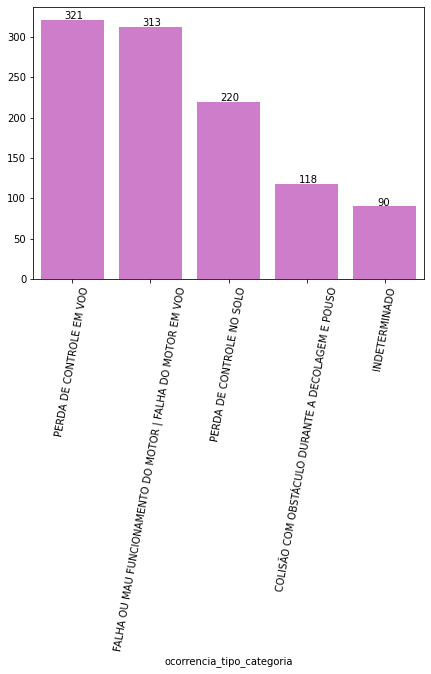

In [ ]:
# gráfico de acidentes por ocorrencia_tipo_categoria - 5+
px = df_ac1['ocorrencia_tipo_categoria'].value_counts().head(5)

fig = plt.figure(figsize=(7,5))
cx = sns.barplot(px.index, px.values,data=octipo, color="orchid")

plt.xlabel('ocorrencia_tipo_categoria')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+1))

In [ ]:
# Como já teve mergear tabelas ocorrencia e fator contribuinte, pelo cod ocorrencia 3, não precisa
#inner_merged2 = pd.merge(ocorrencia, fatorc, on=["codigo_ocorrencia3"], how="inner")

In [ ]:
# criar df pra tabela nova, com filtro pelos acidentes
df_ac2 = inner_merged2[inner_merged2['ocorrencia_classificacao'] == 'ACIDENTE']

In [ ]:
df_ac2.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_dia,total_aeronaves_envolvidas,Dia,Ano,Mes,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,39115,39115,39115,ACIDENTE,CORRENTINA,BA,2010-07-02,1,2,2010,7,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [ ]:
df_ac2.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'ocorrencia_classificacao', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_dia', 'total_aeronaves_envolvidas', 'Dia',
       'Ano', 'Mes', 'fator_nome', 'fator_aspecto', 'fator_condicionante',
       'fator_area'],
      dtype='object')

In [ ]:
df_ac2.shape

(2948, 16)

In [ ]:
df_ac2.count()

codigo_ocorrencia             2948
codigo_ocorrencia1            2948
codigo_ocorrencia2            2948
codigo_ocorrencia3            2948
ocorrencia_classificacao      2948
ocorrencia_cidade             2948
ocorrencia_uf                 2945
ocorrencia_dia                2948
total_aeronaves_envolvidas    2948
Dia                           2948
Ano                           2948
Mes                           2948
fator_nome                    2948
fator_aspecto                 2825
fator_condicionante           2711
fator_area                    2825
dtype: int64

In [ ]:
df_ac2.describe()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,total_aeronaves_envolvidas,Dia,Ano,Mes
count,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000
mean,50371.517639,50371.517639,50371.517639,50371.517639,1.003053,15.348372,2012.879579,6.625170
std,9308.775710,9308.775710,9308.775710,9308.775710,0.055178,8.811552,2.306087,3.516736
min,39115.000000,39115.000000,39115.000000,39115.000000,1.000000,1.000000,2010.000000,1.000000
25%,44577.000000,44577.000000,44577.000000,44577.000000,1.000000,8.000000,2011.000000,4.000000
50%,46855.000000,46855.000000,46855.000000,46855.000000,1.000000,15.000000,2012.000000,7.000000
75%,52980.000000,52980.000000,52980.000000,52980.000000,1.000000,23.000000,2015.000000,10.000000
max,78655.000000,78655.000000,78655.000000,78655.000000,2.000000,31.000000,2019.000000,12.000000


In [ ]:
# Qtd de codigos de acidentes únicos
df_ac2.codigo_ocorrencia3.nunique()

678

In [ ]:
# acidentes com mais de um fator
df_ac2.codigo_ocorrencia3.value_counts().head(15)

42250    19
41053    19
42921    19
44796    18
44660    18
53340    17
52265    16
43454    16
53488    15
44484    15
45331    15
43719    15
46969    14
43629    14
48727    14
Name: codigo_ocorrencia3, dtype: int64

In [ ]:
print(df_ac2['fator_nome'].value_counts())

JULGAMENTO DE PILOTAGEM         379
APLICAÇÃO DE COMANDOS           242
PLANEJAMENTO DE VOO             239
SUPERVISÃO GERENCIAL            238
PROCESSO DECISÓRIO              154
                               ... 
VESTIMENTA INADEQUADA             1
CONHECIMENTO DE NORMAS (ATS)      1
PLANEJAMENTO DE TR�FEGO           1
COLIS�O COM AVE                   1
USO IL�CITO DE DROGAS             1
Name: fator_nome, Length: 63, dtype: int64


In [ ]:
# tabela fator nome com %
df_ac2.stb.freq(['fator_nome'], thresh=50)

,fator_nome,count,percent,cumulative_count,cumulative_percent
0,JULGAMENTO DE PILOTAGEM,379,12.856174,379,12.856174
1,APLICAÇÃO DE COMANDOS,242,8.208955,621,21.065129
2,PLANEJAMENTO DE VOO,239,8.107191,860,29.172320
3,SUPERVISÃO GERENCIAL,238,8.073270,1098,37.245590
4,PROCESSO DECISÓRIO,154,5.223881,1252,42.469471
5,MANUTENÇÃO DE AERONAVE,149,5.054274,1401,47.523745
6,others,1547,52.476255,2948,100.000000


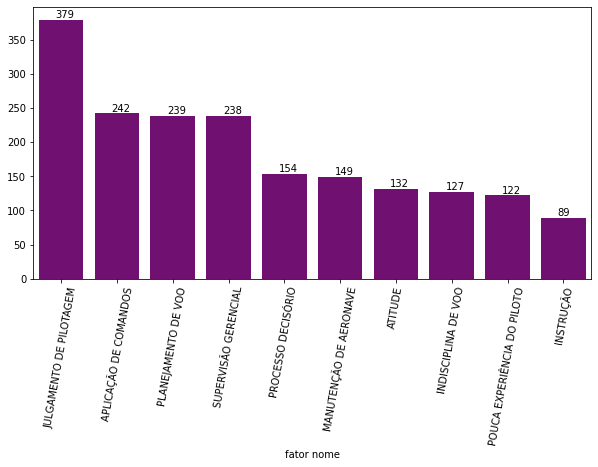

In [ ]:
# acidentes por fator_nome
px = df_ac2['fator_nome'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=fatorc, color="purple")

plt.xlabel('fator nome')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+3))

In [ ]:
print(df_ac2['fator_aspecto'].value_counts())

DESEMPENHO DO SER HUMANO           1746
ASPECTO PSICOLÓGICO                 935
ASPECTO MÉDICO                       59
INFRAESTRUTURA AEROPORTUÁRIA         36
ERGONOMIA                            30
ASPECTO DA FABRICAÇÃO                 8
INFRAESTRUTURA DE TRÁFEGO AÉREO       5
ASPECTO DO PROJETO                    4
ASPECTO DO MANUSEIO MATERIAL          2
Name: fator_aspecto, dtype: int64


In [ ]:
# tabela fator aspecto com %
df_ac2.stb.freq(['fator_aspecto'], thresh =97)

,fator_aspecto,count,percent,cumulative_count,cumulative_percent
0,DESEMPENHO DO SER HUMANO,1746,61.805310,1746,61.805310
1,ASPECTO PSICOLÓGICO,935,33.097345,2681,94.902655
2,ASPECTO MÉDICO,59,2.088496,2740,96.991150
3,others,85,3.008850,2825,100.000000


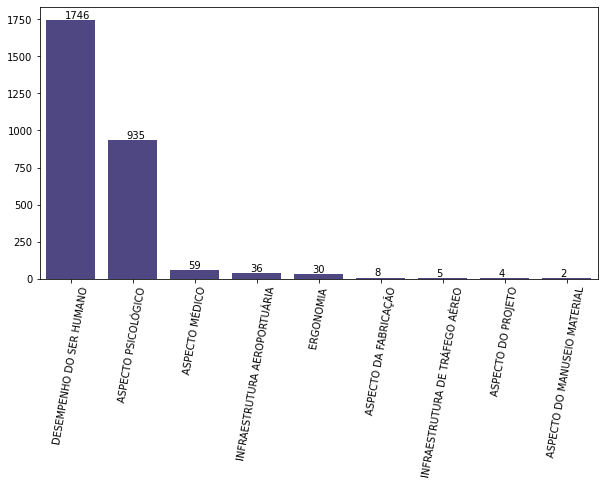

In [ ]:
# Gráfico de aspectos do FC
px = df_ac2['fator_aspecto'].value_counts()

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=fatorc, color="darkslateblue")
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))


In [ ]:
print(df_ac2['fator_condicionante'].value_counts())

OPERAÇÃO DA AERONAVE                      1593
INDIVIDUAL                                 546
ORGANIZACIONAL                             305
MANUTENÇÃO DA AERONAVE                     149
PSICOSSOCIAL                               114
PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO       4
Name: fator_condicionante, dtype: int64


In [ ]:
# tabela fator condicionante com %
df_ac2.stb.freq(['fator_condicionante'], thresh =97)

,fator_condicionante,count,percent,cumulative_count,cumulative_percent
0,OPERAÇÃO DA AERONAVE,1593,58.760605,1593,58.760605
1,INDIVIDUAL,546,20.140170,2139,78.900775
2,ORGANIZACIONAL,305,11.250461,2444,90.151236
3,MANUTENÇÃO DA AERONAVE,149,5.496127,2593,95.647363
4,others,118,4.352637,2711,100.000000


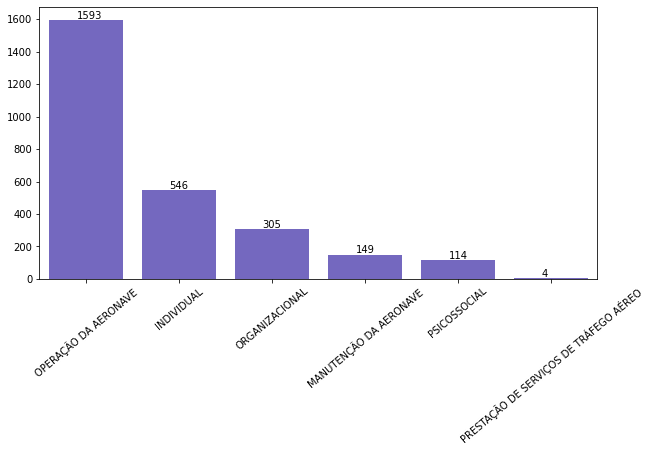

In [ ]:
# Por fator condicionantes
px = df_ac2['fator_condicionante'].value_counts()

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=fatorc, color="slateblue")
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=40)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))

In [ ]:
print(df_ac2['fator_area'].value_counts())

FATOR OPERACIONAL    1787
FATOR HUMANO         1024
FATOR MATERIAL         14
Name: fator_area, dtype: int64


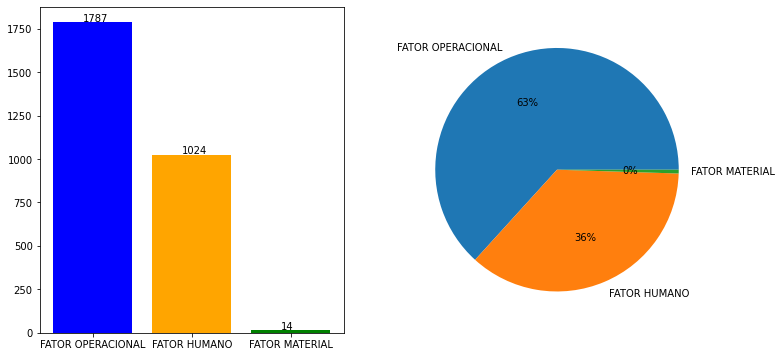

In [ ]:
# Por area
px = df_ac2['fator_area'].value_counts()

fig, (cx,dx) = plt.subplots(1,2, figsize=(12,6))
#cx.bar(px.index, px.values, color=("red","blue","purple"))
cx.bar(px.index, px.values, color=("blue","orange","green"))
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+5))

# Graf nivel dano - pizza
dx = df_ac2['fator_area'].value_counts().plot(kind='pie', subplots=True,
                                                     label="" ,
                                                    # figsize=(6, 6),
                                                     autopct='%1.0f%%'
                                                     )

# Mapa dos incidentes no BR

In [ ]:
import folium

In [ ]:
data_inc = pd.DataFrame ({
    'lat' : [-23.52, -22.9, -19.81, -25.42,  -30.03, -16.67, -1.45, -15.59, -3.1,    -12.97, -27.59,  -15.78,  -20.44,  -8.05,    -3.71,   -20.31,   -2.53,   -9.97,   -10.16,   2.82,   -5.08,   -8.76,  -7.11,    -10.91,   -9.66,    -6.19,    0.03],
    'lon' : [-46.63, -43.2, -43.95, -49.27,  -51.23, -49.25, -48.5, -56.09, -60.02,  -38.51, -48.54,   -47.93, -54.64,  -34.88,   -38.54,  -40.33,   -44.3,  -67.81,   -48.33,  -60.67,  -42.8,   -63.9,  -34.86,   -37.07,   -35.73,   -35.16,   -51.06],
    'name' : ['SP',   'RJ',   'MG',   'PR',   'RS',   'GO',  'PA',  'MT',    'AM',   'BA',    'SC',   'DF',     'MS',    'PE',    'CE',    'ES',      'MA',   'AC',     'TO',   'RR',     'PI',   'RO',   'PB',     'SE',     'AL',     'RN',    'AP'],
    'value' : [882,  410,    355,    305,      175,    163,   144,   108,     151,    142,     106,    122,      58,      71,      56,      61,        39,     42,       28,     19,       22,     20,     16,       13,       25,       10,       5]
})

In [ ]:
map_br_inc = folium.Map(location=[-12, -50],
                 zoom_start = 4, control_scale = True, prefer_canvas=True)


data_inc['value']=data_inc.value.astype(float)

for i in range(0,len(data_inc)):
   folium.Circle(
      location=[data_inc.iloc[i]['lat'], data_inc.iloc[i]['lon']],
      popup="<br>ESTADO: "+data_inc.iloc[i]['name']+"<br>"+"<br>QUANTIDADE DE INCIDENTES: " + str(int(data_inc['value'][i])),
      radius=data_inc.iloc[i]['value']*200,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map_br_inc)

map_br_inc

# Mapa dos acidentes no BR

In [ ]:
import folium

In [ ]:
data_ac = pd.DataFrame ({
    'lat' : [-23.52, -22.9, -19.81, -25.42,  -30.03, -16.67, -1.45, -15.59, -3.1,    -12.97, -27.59,  -15.78,  -20.44,  -8.05,    -3.71,   -20.31,   -2.53,   -9.97,   -10.16,   2.82,   -5.08,   -8.76,  -7.11,    -10.91,   -9.66,    -6.19,    0.03],
    'lon' : [-46.63, -43.2, -43.95, -49.27,  -51.23, -49.25, -48.5, -56.09, -60.02,  -38.51, -48.54,   -47.93, -54.64,  -34.88,   -38.54,  -40.33,   -44.3,  -67.81,   -48.33,  -60.67,  -42.8,   -63.9,  -34.86,   -37.07,   -35.73,   -35.16,   -51.06],
    'name' : ['SP',   'RJ',   'MG',   'PR',   'RS',   'GO',  'PA',  'MT',    'AM',   'BA',    'SC',   'DF',     'MS',    'PE',    'CE',    'ES',      'MA',   'AC',     'TO',   'RR',     'PI',   'RO',   'PB',     'SE',     'AL',     'RN',    'AP'],
    'value' : [357,  70,    127,    136,      159,    123,   119,   147,     66,    58,        60,    7,        74,       19,       22,      9,       29,     12,        18,     30,       14,      10,     7,      8,       5,       4,       4]
})

In [ ]:
map_br_ac = folium.Map(location=[-12, -50],
                 zoom_start = 4, control_scale = True, prefer_canvas=True)


data_ac['value']=data_ac.value.astype(float)

for i in range(0,len(data_ac)):
   folium.Circle(
      location=[data_ac.iloc[i]['lat'], data_ac.iloc[i]['lon']],
      popup="<br>ESTADO: "+data_ac.iloc[i]['name']+"<br>"+"<br>QUANTIDADE DE ACIDENTES: " + str(int(data_ac['value'][i])),
      radius=data_ac.iloc[i]['value']*500,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map_br_ac)

map_br_ac